In [1]:
import pandas as pd

df = pd.read_csv("loan_data.csv")
print(df.shape)
print(df.info())
print(df.describe())
print(df['not.fully.paid'].value_counts(normalize=True))


(9578, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
       credit.policy     int.rate  installment 

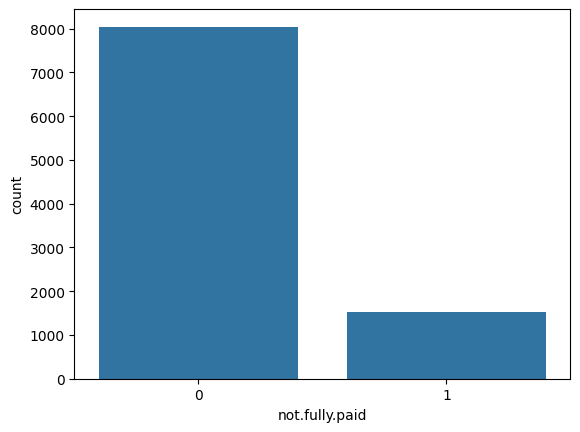

<Axes: xlabel='not.fully.paid', ylabel='int.rate'>

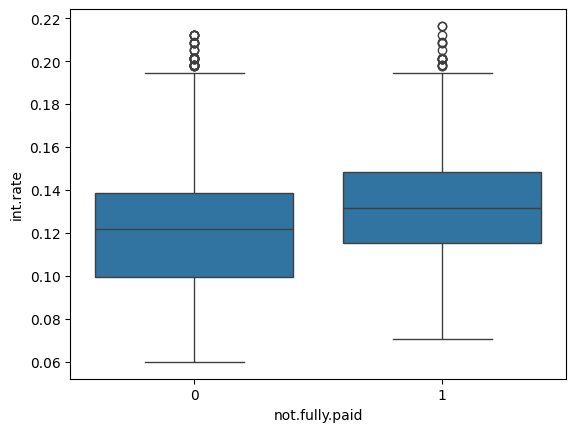

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='not.fully.paid', data=df)
plt.show()

sns.boxplot(x='not.fully.paid', y='int.rate', data=df)
#sns.heatmap(df.corr(), annot=True, fmt='.2f')


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# One-hot encode purpose
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
print(df.columns)
# Feature/target split
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Save the feature names (important!)
feature_names = X.columns.tolist()

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scaling (optional)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.shape)

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')
(1916, 18)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print(X_test.shape)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


(1916, 18)
[[1600    9]
 [ 303    4]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.31      0.01      0.03       307

    accuracy                           0.84      1916
   macro avg       0.57      0.50      0.47      1916
weighted avg       0.76      0.84      0.77      1916

ROC-AUC: 0.6563325593212447


In [5]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='roc_auc')
grid.fit(X_train, y_train)

print(grid.best_params_)
best_model = grid.best_estimator_


{'max_depth': 10, 'n_estimators': 200}


<Axes: >

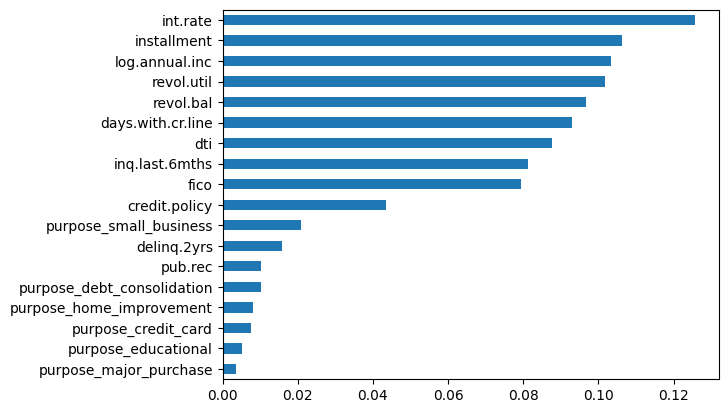

In [6]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')


In [7]:
import joblib
joblib.dump(best_model, 'loan_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(feature_names, "feature_names.pkl")


['feature_names.pkl']